In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [62]:
# Step 1: Read the Titanic dataset and Split into Training and Testing Sets

titanic_data = pd.read_csv('titanic-passengers2.csv')

titanic_data = titanic_data.drop_duplicates()
titanic_data = titanic_data.dropna()

label_encoder = LabelEncoder()
X["Sex"] = label_encoder.fit_transform(X["Sex"])

titanic_data['Survived'] = titanic_data['Survived'].map({'No': 0, 'Yes': 1})

X = titanic_data.drop(["Survived", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

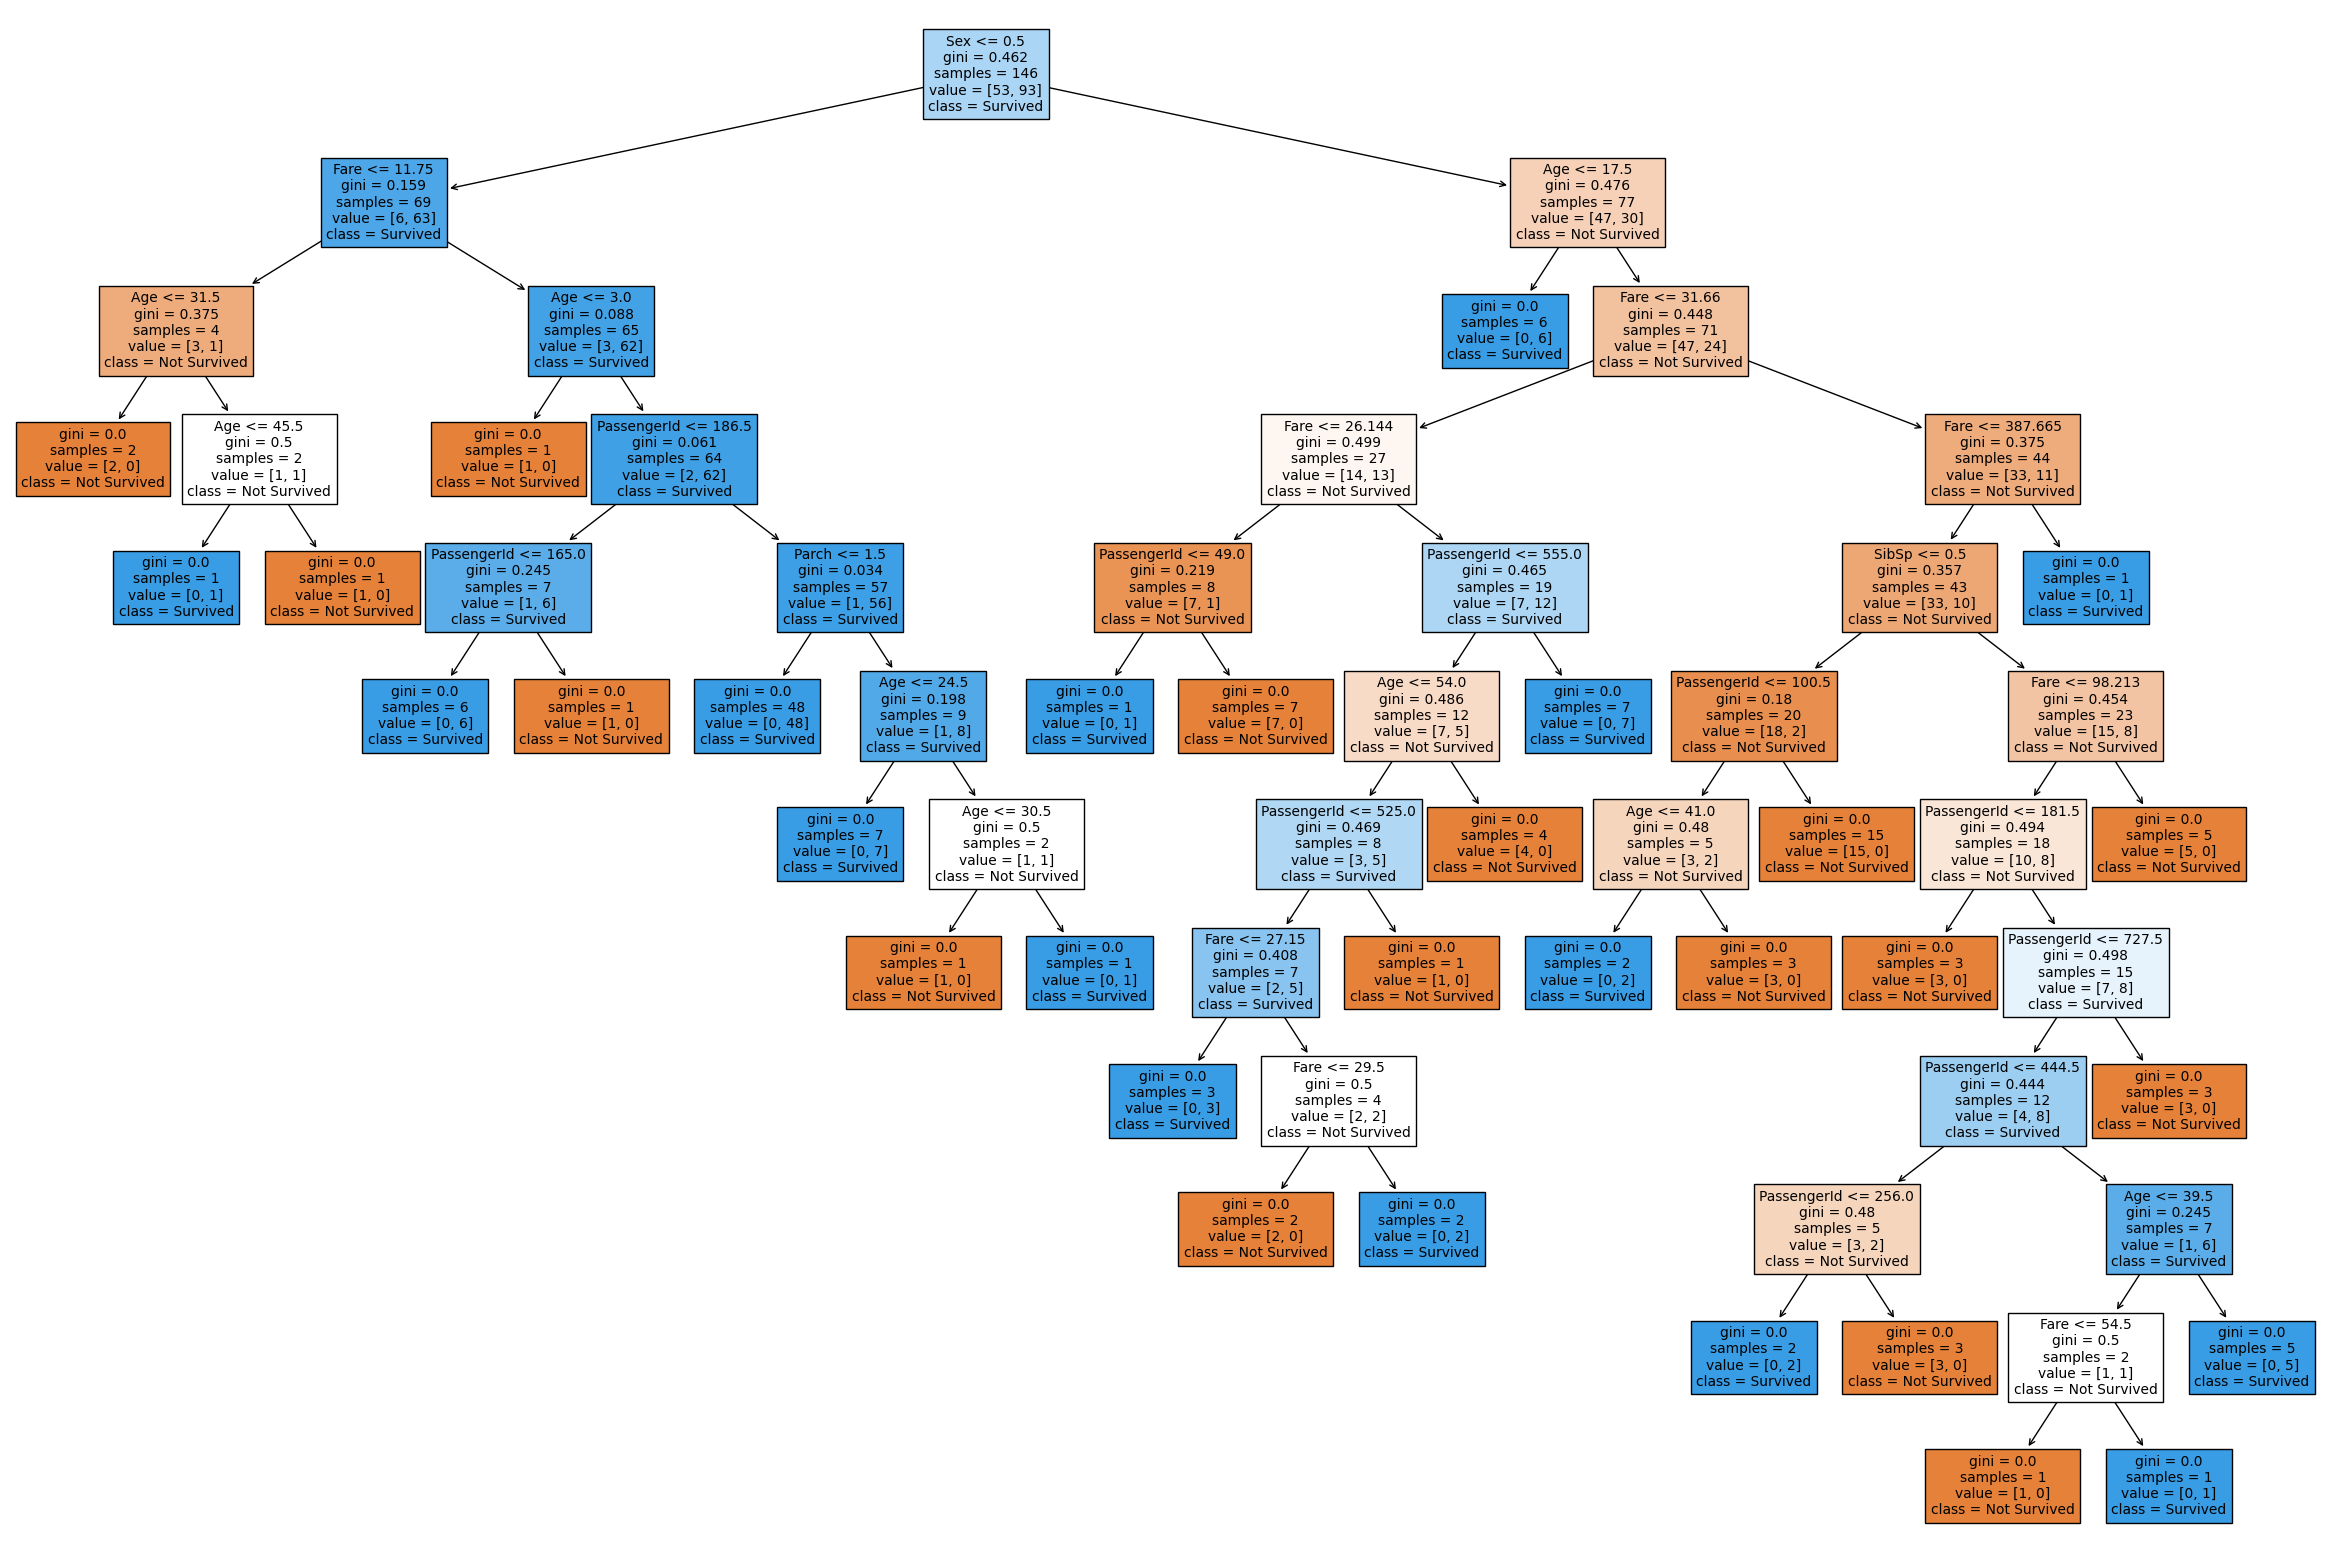

In [54]:
# Step 2: Apply Decision Tree Classifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'])
plt.show()

In [52]:
# Step 3: Change Decision Tree Parameters

clf_modified = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
clf_modified.fit(X_train, y_train)


In [51]:
# Step 4: Calculate New Accuracy for Modified Decision Tree

y_pred_modified = clf_modified.predict(X_test)

accuracy_modified = accuracy_score(y_test, y_pred_modified)
print("Accuracy with modified decision tree parameters:", accuracy_modified)


Accuracy with modified decision tree parameters: 0.8648648648648649


In [46]:
# Step 5: Use Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Step 6: Change the number of estimators and Calculate New Accuracy
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(X_train, y_train)
accuracy_rf_old = rf.score(X_test, y_test)
accuracy_rf_new = rf_new.score(X_test, y_test)
print("Previous Random Forest accuracy:", accuracy_rf_old)
print("New Random Forest accuracy:", accuracy_rf_new)

Previous Random Forest accuracy: 0.7027027027027027
New Random Forest accuracy: 0.7027027027027027
